In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Preprocessing: EnDe

In [ ]:
ende_df = pd.read_csv("mqm_generalMT2022_ende.tsv", sep="\\t")

<ipython-input-6-cf9f3a583d1d>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ende_df = pd.read_csv("mqm_generalMT2022_ende.tsv", sep="\\t")


In [ ]:
ende_df.head()

,system,doc,doc_id,seg_id,rater,source,target,category,severity
0,Online-B,news_stv.tv.1681:English-German,1,956,rater1,Warning of stormy weather as strong winds pres...,"Warnung vor stürmischem Wetter, da starke Wind...",No-error,No-error
1,Online-B,news_stv.tv.1681:English-German,2,957,rater1,Storm force winds are set to batter northern p...,Sturmböen werden nördliche Teile Schottlands t...,No-error,No-error
2,Online-B,news_stv.tv.1681:English-German,3,958,rater1,"The northwest, Shetland and Orkney will face g...","Der Nordwesten, Shetland und Orkney <v>werden<...",Fluency/Punctuation,minor
3,Online-B,news_stv.tv.1681:English-German,4,959,rater1,"The Hebrides, and western coast of the Highlan...",Die Hebriden und die Westküste der Highlands s...,No-error,No-error
4,Online-B,news_stv.tv.1681:English-German,5,960,rater1,Experts are warning that the bad weather could...,"Experten warnen davor, dass das schlechte Wett...",No-error,No-error


In [ ]:
len(ende_df["source"].unique())

1377

In [ ]:
ende_df.groupby("category").count()

,system,doc,doc_id,seg_id,rater,source,target,severity
category,,,,,,,,
Accuracy/Addition,94,94,94,94,94,94,94,94
Accuracy/Mistranslation,4867,4867,4867,4867,4867,4867,4867,4867
Accuracy/Omission,194,194,194,194,194,194,194,194
Accuracy/Source language fragment,711,711,711,711,711,711,711,711
Fluency/Character encoding,67,67,67,67,67,67,67,67
Fluency/Grammar,2195,2195,2195,2195,2195,2195,2195,2195
Fluency/Inconsistency,331,331,331,331,331,331,331,331
Fluency/Punctuation,2158,2158,2158,2158,2158,2158,2158,2158
Fluency/Register,200,200,200,200,200,200,200,200


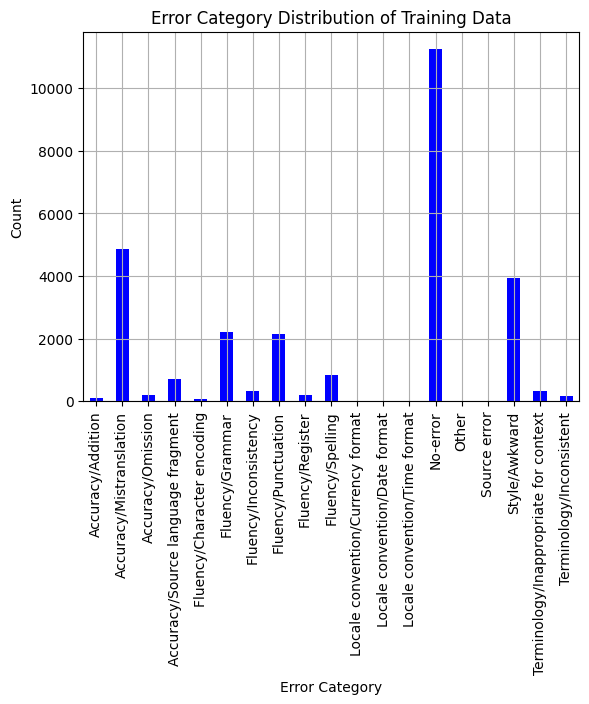

In [ ]:
error_dist = ende_df.groupby("category").count()["system"]
error_dist.plot.bar(title="Error Category Distribution of Training Data", color="blue")
plt.xlabel("Error Category")
plt.ylabel("Count")
plt.grid()
plt.show()


In [ ]:
ende_df[["system","seg_id","source", "target"]].value_counts().reset_index(name='count')

,system,seg_id,source,target,count
0,OpenNMT,1003,As well as every cart brought to the front.,"<v>So wie</v> jeder Wagen, der nach vorne gebr...",2
1,QUARTZ_TuneReranking,1061,I really wanted the Tortuga but when it was al...,"Ich wollte die Tortuga unbedingt, aber als sie...",2
2,Online-A,373,I would need to know if the book shows error m...,"Ich müsste wissen, ob das Buch eine Fehlermeld...",2
3,comet_bestmbr,770,On several occasions (through various lockdown...,Bei mehreren Gelegenheiten (durch diverse <v>S...,2
4,PROMT,83,please check your mail.,Bitte überprüfen Sie Ihre E-<v>Mail</v>,2
...,...,...,...,...,...
27277,Online-G,70,Go to the Home screen.,Gehen Sie zum Startbildschirm.,1
27278,Online-G,69,Tap the #PRS_ORG# icon at the top of the screen.,Tippen Sie oben auf dem Bildschirm auf das Sym...,1
27279,Online-G,68,"To repair your account on the android app, ple...","Um Ihr Konto in der Android-App zu reparieren,...",1
27280,Online-G,67,now please try to perform this procedure on yo...,"<v>versuchen</v> Sie nun, diesen Vorgang in Ih...",1


In [ ]:
print(ende_df["category"].unique())
print(len(ende_df["category"].unique()))

# Only 19 / 21 possible categories in the training set

# ['No-error' 'Fluency/Punctuation' 'Accuracy/Mistranslation'
#  'Accuracy/Addition' 'Accuracy/Omission'
#  'Accuracy/Source language fragment' 'Style/Awkward'
#  'Terminology/Inappropriate for context' 'Fluency/Grammar'
#  'Terminology/Inconsistent' 'Fluency/Register' 'Fluency/Spelling'
#  'Style/A']

['No-error' 'Fluency/Punctuation' 'Accuracy/Mistranslation'
 'Accuracy/Addition' 'Accuracy/Omission'
 'Accuracy/Source language fragment' 'Style/Awkward'
 'Terminology/Inappropriate for context' 'Fluency/Grammar'
 'Terminology/Inconsistent' 'Fluency/Register' 'Fluency/Spelling'
 'Fluency/Inconsistency' 'Other' 'Source error'
 'Locale convention/Currency format' 'Locale convention/Date format'
 'Fluency/Character encoding' 'Locale convention/Time format']
19


In [ ]:
ende_ohe = pd.get_dummies(ende_df, columns=["category"])
ende_ohe


,system,doc,doc_id,seg_id,rater,source,target,severity,category_Accuracy/Addition,category_Accuracy/Mistranslation,...,category_Fluency/Spelling,category_Locale convention/Currency format,category_Locale convention/Date format,category_Locale convention/Time format,category_No-error,category_Other,category_Source error,category_Style/Awkward,category_Terminology/Inappropriate for context,category_Terminology/Inconsistent
0,Online-B,news_stv.tv.1681:English-German,1,956,rater1,Warning of stormy weather as strong winds pres...,"Warnung vor stürmischem Wetter, da starke Wind...",No-error,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Online-B,news_stv.tv.1681:English-German,2,957,rater1,Storm force winds are set to batter northern p...,Sturmböen werden nördliche Teile Schottlands t...,No-error,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Online-B,news_stv.tv.1681:English-German,3,958,rater1,"The northwest, Shetland and Orkney will face g...","Der Nordwesten, Shetland und Orkney <v>werden<...",minor,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Online-B,news_stv.tv.1681:English-German,4,959,rater1,"The Hebrides, and western coast of the Highlan...",Die Hebriden und die Westküste der Highlands s...,No-error,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Online-B,news_stv.tv.1681:English-German,5,960,rater1,Experts are warning that the bad weather could...,"Experten warnen davor, dass das schlechte Wett...",No-error,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27322,PROMT,ecommerce_ecommerce_en_30:English-German,10,535,rater7,Please take the time to review both the attach...,"Bitte nehmen Sie sich die Zeit, sowohl den bei...",minor,0,0,...,0,0,0,0,0,0,0,1,0,0
27323,Lan-Bridge,conversation_en_zh-TW_CLIENT-05_2020-12-20-109...,1,385,rater7,"Please wait for the order, and you can report ...","Bitte warten Sie auf die Bestellung, und Sie k...",No-error,0,0,...,0,0,0,0,1,0,0,0,0,0
27324,Lan-Bridge,conversation_en_zh-TW_CLIENT-05_2020-12-20-109...,2,386,rater7,I know having a credit will not make your food...,"Ich weiß, dass eine Gutschrift Ihr <v>Essenser...",minor,0,0,...,0,0,0,0,0,0,0,1,0,0
27325,refB,conversation_en_fr_CLIENT-02_default_2020-12-2...,1,205,rater7,Even if you don't know your password you can c...,Selbst wenn Sie Ihr Passwort nicht mehr wissen...,minor,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Here we follow the Google papers's weightings for "major", "minor" and "neutral" / no-error
for idx in ende_ohe.index:
  svr = ende_ohe["severity"][idx]
  wgt = 0
  if (svr == "minor"):
    if (ende_ohe["category_Fluency/Punctuation"][idx] == 1):
      wgt = 0.1
    else:
      wgt = 1.0
  elif (svr == "major"):
    if (("category_Non-translation" in ende_ohe.columns) and (ende_ohe["category_Non-translation"][idx] == 1)):
      wgt = 25.0
    else:
      wgt = 5

  for col in ende_ohe.columns:
    if (str(col).startswith("category")):
      ende_ohe.loc[idx, col] *= wgt

In [ ]:
ende_aggr = ende_ohe.groupby(["source",  "seg_id", "target", "doc_id", "system"]).max()
ende_aggr

doc  \
source                                             seg_id target                                             doc_id system                                                   
"All proceeds to the defendants so they can go ... 892    "Alles geht an die Angeklagten, damit sie <v>na... 5      M2M100_1.2B-B4        news_rt.com.18622:English-German   
                                                          "Alles geht an die Angeklagten, damit sie nach ... 5      M2M100_1.2B-B4        news_rt.com.18622:English-German   
                                                          "Der gesamte Erlös geht an die Angeklagten, dam... 5      QUARTZ_TuneReranking  news_rt.com.18622:English-German   
                                                          <<v>unk</v>>Alle Erlöse gehen an die Angeklagte... 5      Lan-Bridge            news_rt.com.18622:English-German   
                                                          <unk>Alle Erlöse gehen an die Angeklagten, dami... 5      Lan-Bridge            news_rt.com.18622:English-German   
...                                                                                                                                                                    ...   
“Sure, OP.                                         1205   „Sicher, <v>OP</v>.                                10     Online-B               social_t3_qle58z:English-German   
                                                                                                                    bleu_bestmbr           social_t3_qle58z:English-German   
                                                                                                                    refB                   social_t3_qle58z:English-German   
                                                          „Sicher, <v>OP</v>.“                               10     comet_bestmbr          social_t3_qle58z:English-German   
                                                          „Sicher, OP.<v>“</v>                               10     comet_bestmbr          social_t3_qle58z:English-German   

                                                                                                                                           rater  \
source                                             seg_id target                                             doc_id system                         
"All proceeds to the defendants so they can go ... 892    "Alles geht an die Angeklagten, damit sie <v>na... 5      M2M100_1.2B-B4        rater7   
                                                          "Alles geht an die Angeklagten, damit sie nach ... 5      M2M100_1.2B-B4        rater7   
                                                          "Der gesamte Erlös geht an die Angeklagten, dam... 5      QUARTZ_TuneReranking  rater7   
                                                          <<v>unk</v>>Alle Erlöse gehen an die Angeklagte... 5      Lan-Bridge            rater7   
                                                          <unk>Alle Erlöse gehen an die Angeklagten, dami... 5      Lan-Bridge            rater7   
...                                                                                                                                          ...   
“Sure, OP.                                         1205   „Sicher, <v>OP</v>.                                10     Online-B              rater4   
                                                                                                                    bleu_bestmbr          rater4   
                                                                                                                    refB                  rater4   
                                                          „Sicher, <v>OP</v>.“                               10     comet_bestmbr         rater4   
                                                          „Sicher, OP.<v>“</v>                               10     comet_bestmb

In [ ]:
# ende_aggr.index.get_level_values("seg_id")
ende_aggr.loc[(ende_aggr.index.get_level_values("seg_id") == 1061) & (ende_aggr.index.get_level_values("system") == "QUARTZ_TuneReranking")]

,,,,,doc,rater,severity,category_Accuracy/Addition,category_Accuracy/Mistranslation,category_Accuracy/Omission,category_Accuracy/Source language fragment,category_Fluency/Character encoding,category_Fluency/Grammar,category_Fluency/Inconsistency,...,category_Fluency/Spelling,category_Locale convention/Currency format,category_Locale convention/Date format,category_Locale convention/Time format,category_No-error,category_Other,category_Source error,category_Style/Awkward,category_Terminology/Inappropriate for context,category_Terminology/Inconsistent
source,seg_id,target,doc_id,system,,,,,,,,,,,,,,,,,,,,,
"I really wanted the Tortuga but when it was all priced up, it was over AU$500 (incl. shipping and exchange rate).",1061,"Ich wollte die Tortuga unbedingt, aber als sie versteigert wurde, kostete sie über <v>AU $500</v> (inkl. Versand und Wechselkurs).",6,QUARTZ_TuneReranking,social_t1_hmpp3wk:English-German,rater4,minor,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


# Preprocessing: ZhEn

In [ ]:
zhen_df = pd.read_csv("mqm_generalMT2022_zhen.tsv", sep="\\t")
zhen_df.head()

<ipython-input-14-9d6879b6a58c>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  zhen_df = pd.read_csv("mqm_generalMT2022_zhen.tsv", sep="\\t")


,system,doc,doc_id,seg_id,rater,source,target,category,severity
0,Lan-Bridge.en,conversation_en_zh-TW_CLIENT-05_2020-12-20-134...,1,13,rater3,我要怎样给钱？,How do I pay?,No-error,No-error
1,Lan-Bridge.en,conversation_en_zh-TW_CLIENT-05_2020-12-20-134...,2,14,rater3,重送的餐已经送到了,The redelivered meal has been delivered,No-error,No-error
2,JDExploreAcademy.en,conversation_en_zh-TW_CLIENT-05_2020-12-20-298...,1,59,rater3,实际优惠code 详情是在哪里看,<v>Where</v> is the actual discount code details,Accuracy/Source language fragment,minor
3,M2M100_1.2B-B4.en,conversation_en_zh-TW_CLIENT-05_2020-12-20-329...,1,69,rater3,你好,Hello <v>to you</v>.,Accuracy/Addition,major
4,M2M100_1.2B-B4.en,conversation_en_zh-TW_CLIENT-05_2020-12-20-329...,2,70,rater3,请问，订单时间不断延长,Order time is continuously extended.,No-error,No-error


In [ ]:
print(len(zhen_df["source"].unique()))
zhen_df.groupby("category").count()

3086


,system,doc,doc_id,seg_id,rater,source,target,severity
category,,,,,,,,
Accuracy/Addition,226,226,226,226,226,226,226,226
Accuracy/Mistranslation,14632,14632,14632,14632,14632,14632,14632,14632
Accuracy/Omission,1665,1665,1665,1665,1665,1665,1665,1665
Accuracy/Source language fragment,346,346,346,346,346,346,346,346
Fluency/Character encoding,31,31,31,31,31,31,31,31
Fluency/Grammar,4133,4133,4133,4133,4133,4133,4133,4133
Fluency/Inconsistency,560,560,560,560,560,560,560,560
Fluency/Punctuation,3032,3032,3032,3032,3032,3032,3032,3032
Fluency/Register,27,27,27,27,27,27,27,27


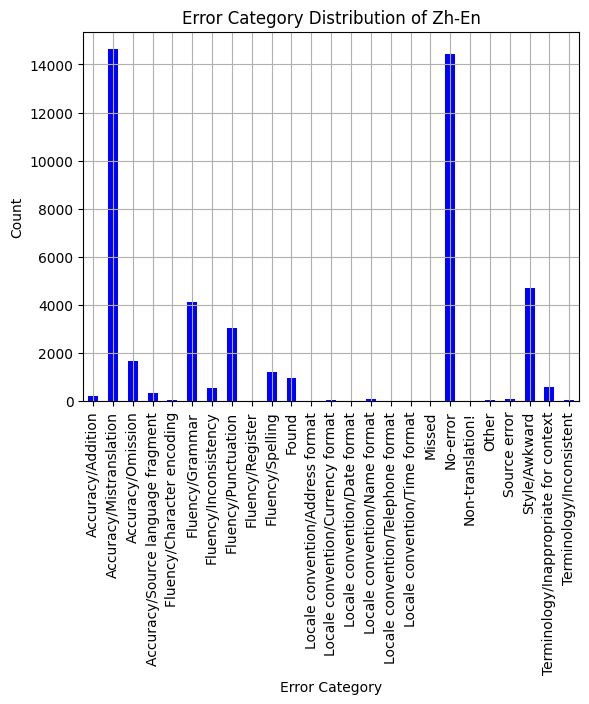

In [ ]:
error_dist = zhen_df.groupby("category").count()["system"]
error_dist.plot.bar(title="Error Category Distribution of Zh-En", color="blue")
plt.xlabel("Error Category")
plt.ylabel("Count")
plt.grid()
plt.show()

In [ ]:
zhen_df[["system","seg_id","source", "target"]].value_counts().reset_index(name='count')

,system,seg_id,source,target,count
0,M2M100_1.2B-B4.en,381,形而上学是哲学的基本法则，旨在解释存在和世界的基本性质。,Methematics is a basic law of philosophy that ...,2
1,refB.en,261,尽管德尔塔仍然是全世界主要的新冠病毒株，但奥密克戎病例正在数十个国家出现，其中南非为疫情中心。,Although Delta is still the main COVID-19 vira...,2
2,JDExploreAcademy.en,263,经医院隔离治疗后，这两名感染者核酸检测结果均转为阴性，目前已返回各自的居住地。,"After hospital isolation and treatment, the nu...",2
3,Online-Y.en,51,从预计7:30 到现在,From the estimated 7:30 until now,2
4,Lan-Bridge.en,315,青海三江源地区是我国乃至亚洲重要的生态屏障和水源涵养区，而青海湖是控制西部荒漠化向东蔓延的天...,Qinghai Sanjiangyuan area is an important ecol...,2
...,...,...,...,...,...
46464,M2M100_1.2B-B4.en,178,但是可能因为没和我交流具体的拍摄想法，所以拍出来的不是我想要的风格，但是应该是好看的<v>🙊...,But maybe because I didn't communicate concret...,1
46465,M2M100_1.2B-B4.en,178,但是可能因为没和我交流具体的拍摄想法，所以拍出来的不是我想要的风格，但是应该是好看的🙊🙊,But maybe because <v>I</v> didn't communicate ...,1
46466,M2M100_1.2B-B4.en,178,信誉卖家，仔细检查整机外观，所有接口，无翻新或使用过的痕迹，的确是全新美版机，配置跟页面一样。,"A reputable seller, carefully check the appear...",1
46467,M2M100_1.2B-B4.en,178,她以非凡的科技成就荣膺国际欧亚科学院院士等重要荣誉称号，以自己辉煌的业绩为自己在世界科技圣殿...,She has honoured important honorary titles suc...,1


In [ ]:
print(zhen_df["category"].unique())
print(len(zhen_df["category"].unique()))

['No-error' 'Accuracy/Source language fragment' 'Accuracy/Addition'
 'Fluency/Grammar' 'Found' 'Accuracy/Mistranslation' 'Style/Awkward'
 'Terminology/Inappropriate for context' 'Locale convention/Name format'
 'Fluency/Spelling' 'Terminology/Inconsistent' 'Fluency/Punctuation'
 'Fluency/Register' 'Locale convention/Currency format'
 'Fluency/Character encoding' 'Fluency/Inconsistency' 'Missed'
 'Locale convention/Address format' 'Other' 'Accuracy/Omission'
 'Locale convention/Date format' 'Locale convention/Time format'
 'Non-translation!' 'Source error' 'Locale convention/Telephone format']
25


In [ ]:
zhen_ohe = pd.get_dummies(zhen_df, columns=["category"])
zhen_ohe

,system,doc,doc_id,seg_id,rater,source,target,severity,category_Accuracy/Addition,category_Accuracy/Mistranslation,...,category_Locale convention/Telephone format,category_Locale convention/Time format,category_Missed,category_No-error,category_Non-translation!,category_Other,category_Source error,category_Style/Awkward,category_Terminology/Inappropriate for context,category_Terminology/Inconsistent
0,Lan-Bridge.en,conversation_en_zh-TW_CLIENT-05_2020-12-20-134...,1,13,rater3,我要怎样给钱？,How do I pay?,No-error,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Lan-Bridge.en,conversation_en_zh-TW_CLIENT-05_2020-12-20-134...,2,14,rater3,重送的餐已经送到了,The redelivered meal has been delivered,No-error,0,0,...,0,0,0,1,0,0,0,0,0,0
2,JDExploreAcademy.en,conversation_en_zh-TW_CLIENT-05_2020-12-20-298...,1,59,rater3,实际优惠code 详情是在哪里看,<v>Where</v> is the actual discount code details,minor,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M2M100_1.2B-B4.en,conversation_en_zh-TW_CLIENT-05_2020-12-20-329...,1,69,rater3,你好,Hello <v>to you</v>.,major,1,0,...,0,0,0,0,0,0,0,0,0,0
4,M2M100_1.2B-B4.en,conversation_en_zh-TW_CLIENT-05_2020-12-20-329...,2,70,rater3,请问，订单时间不断延长,Order time is continuously extended.,No-error,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46983,AISP-SJTU.en,news_xinhua-zh-01.103913:Chinese-English,4,273,rater2,记者了解到，北京市人力资源和社会保障局将搭建实践平台，加大岗位供给，主动联系40家高校毕业生...,The reporter learned that the Beijing Municipa...,minor,0,0,...,0,0,0,0,0,0,0,0,0,0
46984,LanguageX.en,conversation_en_zh-TW_CLIENT-05_2020-12-20-221...,1,32,rater2,我没有收到啊,I didn't get it,No-error,0,0,...,0,0,0,1,0,0,0,0,0,0
46985,LanguageX.en,conversation_en_zh-TW_CLIENT-05_2020-12-20-221...,2,33,rater2,下单才5 分钟，怎么会已完成,"The order has only been placed for 5 minutes, ...",No-error,0,0,...,0,0,0,1,0,0,0,0,0,0
46986,AISP-SJTU.en,conversation_en_zh-TW_CLIENT-05_2020-12-20-221...,1,32,rater2,我没有收到啊,I didn't <v>get</v> it,minor,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
for idx in zhen_ohe.index:
  svr = zhen_ohe["severity"][idx]
  wgt = 0
  if (svr == "minor"):
    if (zhen_ohe["category_Fluency/Punctuation"][idx] == 1):
      wgt = 0.1
    else:
      wgt = 1.0
  elif (svr == "major"):
    if (("category_Non-translation!" in zhen_ohe.columns) and (zhen_ohe["category_Non-translation!"][idx] == 1)):
      wgt = 25.0
    else:
      wgt = 5

  for col in zhen_ohe.columns:
    if (str(col).startswith("category")):
      zhen_ohe.loc[idx, col] *= wgt

In [ ]:
zhen_aggr = zhen_ohe.groupby(["source",  "seg_id", "target", "doc_id", "system"]).max()
zhen_aggr

doc  \
source                                             seg_id target                                             doc_id system                                                                   
#NAME# <v>说</v>帮我重新下单                              67     Name: Help me to order again.                      1      M2M100_1.2B-B4.en    conversation_en_zh-TW_CLIENT-05_2020-12-20-313...   
#NAME# 说<v>帮</v>我重新下单                              67     #NAME# Say reorder for me                          1      Lan-Bridge.en        conversation_en_zh-TW_CLIENT-05_2020-12-20-313...   
#NAME# 说你们没有人去拿                                    73     # NAME # says none of you are going to get it      3      AISP-SJTU.en         conversation_en_zh-TW_CLIENT-05_2020-12-20-323...   
                                                          #NAME # Said no one of you went to get it          3      Online-Y.en          conversation_en_zh-TW_CLIENT-05_2020-12-20-323...   
                                                          #NAME #Say you have no one to take it              3      M2M100_1.2B-B4.en    conversation_en_zh-TW_CLIENT-05_2020-12-20-323...   
...                                                                                                                                                                                    ...   
（这对于投保人来说，就又是一个坑）免费领6万重疾保额，是短期的，如果只靠这个，没有其他商业险，... 456    (this is another pit for the policyholder) It i... 16     JDExploreAcademy.en  social_social_zh_zhihu.com_198127191:Chinese-E...   
                                                          If you rely on this alone, there is no other co... 16     HuaweiTSC.en         social_social_zh_zhihu.com_198127191:Chinese-E...   
                                                          If you rely on this alone<v>, there is no other... 16     HuaweiTSC.en         social_social_zh_zhihu.com_198127191:Chinese-E...   
                                                          The free acquisition of the critical illness in... 16     refB.en              social_social_zh_zhihu.com_198127191:Chinese-E...   
                                                          The free acquisition of the critical illness in... 16     refB.en              social_social_zh_zhihu.com_198127191:Chinese-E...   

                                                                                                                                          rater  \
source                                             seg_id target                                             doc_id system                        
#NAME# <v>说</v>帮我重新下单                              67     Name: Help me to order again.                      1      M2M100_1.2B-B4.en    rater1   
#NAME# 说<v>帮</v>我重新下单                              67     #NAME# Say reorder for me                          1      Lan-Bridge.en        rater1   
#NAME# 说你们没有人去拿                                    73     # NAME # says none of you are going to get it      3      AISP-SJTU.en         rater1   
                                                          #NAME # Said no one of you went to get it          3      Online-Y.en          rater1   
                                                          #NAME #Say you have no one to take it              3      M2M100_1.2B-B4.en    rater1   
...                                                                                                                                         ...   
（这对于投保人来说，就又是一个坑）免费领6万重疾保额，是短期的，如果只靠这个，没有其他商业险，... 456    (this is another pit for the policyholder) It i... 16     JDExploreAcademy.en  rater6   
                                                          If you rely on this alone, there is no other co... 16     HuaweiTSC.en         rater7   
                                                          If you rely on this alone<v>, there is no other... 16     HuaweiTSC.en         rater7   
                                                          The free acquisition of the critical 

In [ ]:
zhen_aggr.loc[zhen_aggr["category_Non-translation!"] > 0]

,,,,,doc,rater,severity,category_Accuracy/Addition,category_Accuracy/Mistranslation,category_Accuracy/Omission,category_Accuracy/Source language fragment,category_Fluency/Character encoding,category_Fluency/Grammar,category_Fluency/Inconsistency,...,category_Locale convention/Telephone format,category_Locale convention/Time format,category_Missed,category_No-error,category_Non-translation!,category_Other,category_Source error,category_Style/Awkward,category_Terminology/Inappropriate for context,category_Terminology/Inconsistent
source,seg_id,target,doc_id,system,,,,,,,,,,,,,,,,,,,,,
2、宁城八里罕老窖大坛装白酒52度窖藏粮食白酒【10斤装】,167,"<v>2, Ningbo eighth Richmond Old Hall cloth white wine 52 degrees storage grain white wine 【10 kg clothes】 </v>",5,M2M100_1.2B-B4.en,ecommerce_ecommerce_zh_jd.com_93697031:Chinese...,rater6,major,0,0,0,0,0,0,0,...,0,0,0,0,25,0,0,0,0,0
【环境】整体还好。,187,<v>The actual fact is that you can find a lot of people who are not able to get a lot of money. </v>,14,Online-W.en,ecommerce_ecommerce_zh_meituan.com_166272631:C...,rater6,major,0,0,0,0,0,0,0,...,0,0,0,0,25,0,0,0,0,0
上首页了，也来看看Queenie吧~,185,<v>See also Queen's page. </v>,12,M2M100_1.2B-B4.en,ecommerce_ecommerce_zh_meituan.com_166272631:C...,rater6,major,0,0,0,0,0,0,0,...,0,0,0,0,25,0,0,0,0,0
保险通常是一份长达几十年的长期契约，我们在购买保险的时候，是不是应该认真思考一下，我们所选择的这个“中介”，是不是一个可以与我们长期相伴、在很多年后也会给我们提供服务的“保险中介人”呢？,469,"<v>Insurance is usually a long-term contract that lasts for decades, so when we buy insurance, shouldn't we seriously think about whether the ""intermediary"" we choose is an ""insurance intermediary"" that will be with us for a long time and will provide services to us even after many years? Is it an ""insurance intermediary"" that will be with us for a long time and provide us with services for many years? </v>",29,Online-W.en,social_social_zh_zhihu.com_198127191:Chinese-E...,rater8,major,0,0,0,0,0,0,0,...,0,0,0,0,25,0,0,0,0,0
兰州交通大学3名学生给校领导写信，反映对大学考试的困惑，并提出提高考试难度，变换考试题型，让考试真正体现学生实际水平的诉求。,326,<v>Reflection on education: How can college examination make “super scholars” and “study slackers” have their proper places - Xinhuanet </v>,2,refB.en,news_xinhua-zh-01.104125:Chinese-English,rater2,major,0,0,0,0,0,0,0,...,0,0,0,0,25,0,0,0,0,0
其中13 元的虾饺就一个！？,76,<v>One of the $13 crumbs? </v>,2,M2M100_1.2B-B4.en,conversation_en_zh-TW_CLIENT-05_2020-12-20-370...,rater6,major,0,0,0,0,0,0,0,...,0,0,0,0,25,0,0,0,0,0
化妆位置差不多有三个，里边是摄影棚。,189,<v>The actual fact is that you can find a lot of people who are not able to get a good deal on a lot of things. </v>,16,Online-W.en,ecommerce_ecommerce_zh_meituan.com_166272631:C...,rater6,major,0,0,0,0,0,0,0,...,0,0,0,0,25,0,0,0,0,0
号称新山区超跑排气声最大！,378,<v>No. The new mountain supercar exhaust sound maximum! </v>,1,Online-W.en,social_social_zh_facebook.com_62145771:Chinese...,rater6,major,0,0,0,0,0,0,0,...,0,0,0,0,25,0,0,0,0,0
它们看起来和网信办官网曾展示的【网络舆情演化模型】相差无二。,445,"<v>We choose three top search topics randomly: Dragon Heads-raising Day, rise in price of Orion and the event of LaLaMove; the public opinions spread and form a wave peak, and then [reduce exponentially] (with a smooth curve), and finally disappear; there will be a small hump in condition of secondary public opinions. </v>",4,refB.en,social_social_zh_weibo.com_53515045:Chinese-En...,rater2,major,0,0,0,0,0,0,0,...,0,0,0,0,25,0,0,0,0,0


# Aggr / scoring

In [ ]:
# As Zh-En has all error categories and two additional labels, we derive the category names from it
error_categories = list(zhen_df["category"].unique())
error_categories.remove("Missed")
error_categories.remove("Found")
for i in range(len(error_categories)):
  error_categories[i] = "category_" + error_categories[i]
error_categories

# Sanity check:
# list(set(zhen_aggr.columns) - set(error_categories))

['category_No-error',
 'category_Accuracy/Source language fragment',
 'category_Accuracy/Addition',
 'category_Fluency/Grammar',
 'category_Accuracy/Mistranslation',
 'category_Style/Awkward',
 'category_Terminology/Inappropriate for context',
 'category_Locale convention/Name format',
 'category_Fluency/Spelling',
 'category_Terminology/Inconsistent',
 'category_Fluency/Punctuation',
 'category_Fluency/Register',
 'category_Locale convention/Currency format',
 'category_Fluency/Character encoding',
 'category_Fluency/Inconsistency',
 'category_Locale convention/Address format',
 'category_Other',
 'category_Accuracy/Omission',
 'category_Locale convention/Date format',
 'category_Locale convention/Time format',
 'category_Non-translation!',
 'category_Source error',
 'category_Locale convention/Telephone format']

In [ ]:
list(set(error_categories) - set(ende_aggr.columns))

['category_Locale convention/Name format',
 'category_Non-translation!',
 'category_Locale convention/Address format',
 'category_Locale convention/Telephone format']

In [ ]:
# Ensure ende has all mqm categories as a column
ende_aggr['category_Locale convention/Name format'] = 0
ende_aggr['category_Non-translation!'] = 0
ende_aggr['category_Locale convention/Address format'] = 0
ende_aggr['category_Locale convention/Telephone format'] = 0
ende_aggr

In [ ]:
# Remove non-mqm label columns
zhen_aggr = zhen_aggr.drop(columns = ["category_Missed", "category_Found"])
zhen_aggr

doc  \
source                                             seg_id target                                             doc_id system                                                                   
#NAME# <v>说</v>帮我重新下单                              67     Name: Help me to order again.                      1      M2M100_1.2B-B4.en    conversation_en_zh-TW_CLIENT-05_2020-12-20-313...   
#NAME# 说<v>帮</v>我重新下单                              67     #NAME# Say reorder for me                          1      Lan-Bridge.en        conversation_en_zh-TW_CLIENT-05_2020-12-20-313...   
#NAME# 说你们没有人去拿                                    73     # NAME # says none of you are going to get it      3      AISP-SJTU.en         conversation_en_zh-TW_CLIENT-05_2020-12-20-323...   
                                                          #NAME # Said no one of you went to get it          3      Online-Y.en          conversation_en_zh-TW_CLIENT-05_2020-12-20-323...   
                                                          #NAME #Say you have no one to take it              3      M2M100_1.2B-B4.en    conversation_en_zh-TW_CLIENT-05_2020-12-20-323...   
...                                                                                                                                                                                    ...   
（这对于投保人来说，就又是一个坑）免费领6万重疾保额，是短期的，如果只靠这个，没有其他商业险，... 456    (this is another pit for the policyholder) It i... 16     JDExploreAcademy.en  social_social_zh_zhihu.com_198127191:Chinese-E...   
                                                          If you rely on this alone, there is no other co... 16     HuaweiTSC.en         social_social_zh_zhihu.com_198127191:Chinese-E...   
                                                          If you rely on this alone<v>, there is no other... 16     HuaweiTSC.en         social_social_zh_zhihu.com_198127191:Chinese-E...   
                                                          The free acquisition of the critical illness in... 16     refB.en              social_social_zh_zhihu.com_198127191:Chinese-E...   
                                                          The free acquisition of the critical illness in... 16     refB.en              social_social_zh_zhihu.com_198127191:Chinese-E...   

                                                                                                                                          rater  \
source                                             seg_id target                                             doc_id system                        
#NAME# <v>说</v>帮我重新下单                              67     Name: Help me to order again.                      1      M2M100_1.2B-B4.en    rater1   
#NAME# 说<v>帮</v>我重新下单                              67     #NAME# Say reorder for me                          1      Lan-Bridge.en        rater1   
#NAME# 说你们没有人去拿                                    73     # NAME # says none of you are going to get it      3      AISP-SJTU.en         rater1   
                                                          #NAME # Said no one of you went to get it          3      Online-Y.en          rater1   
                                                          #NAME #Say you have no one to take it              3      M2M100_1.2B-B4.en    rater1   
...                                                                                                                                         ...   
（这对于投保人来说，就又是一个坑）免费领6万重疾保额，是短期的，如果只靠这个，没有其他商业险，... 456    (this is another pit for the policyholder) It i... 16     JDExploreAcademy.en  rater6   
                                                          If you rely on this alone, there is no other co... 16     HuaweiTSC.en         rater7   
                                                          If you rely on this alone<v>, there is no other... 16     HuaweiTSC.en         rater7   
                                                          The free acquisition of the critical 

In [ ]:
# Calculate summed MQM score
def calc_mqm_score (aggr_df):
  aggr_df["mqm_score"] = aggr_df[error_categories].sum(axis=1)

# calc_mqm_score(ende_aggr)
calc_mqm_score(zhen_aggr)

In [ ]:
# Sanity check
zhen_aggr.loc[zhen_aggr["category_Non-translation!"] > 0]

In [ ]:
# ende_aggr.to_csv("ende_aggr.csv")
zhen_aggr.to_csv("zhen_aggr.csv")

# Train / Test Split

In [ ]:
ende_full = pd.read_csv("/content/ende_aggr.csv")
zhen_full = pd.read_csv("/content/zhen_aggr.csv")

In [ ]:
print(len(min(ende_full['source'], key=len)))
print(len(max(ende_full['source'], key=len)))
print(len(min(ende_full['target'], key=len)))
print(len(max(ende_full['target'], key=len)))

print(len(min(zhen_full['source'], key=len)))
print(len(max(zhen_full['source'], key=len)))
print(len(min(zhen_full['target'], key=len)))
print(len(max(zhen_full['target'], key=len)))

5
519
2
692
2
304
2
1681


In [ ]:
from sklearn.model_selection import train_test_split

ende_train, ende_test = train_test_split(ende_full, test_size=0.2)
ende_train, ende_vld = train_test_split(ende_train, test_size=0.25)
zhen_train, zhen_test = train_test_split(zhen_full, test_size=0.2)
zhen_train, zhen_vld = train_test_split(zhen_train, test_size=0.25)
print(len(ende_train), len(ende_vld), len(ende_test), len(zhen_train), len(zhen_vld), len(zhen_test))

16368 5457 5457 27881 9294 9294


In [ ]:
train_df = pd.concat([ende_train, zhen_train])
vld_df = pd.concat([ende_vld, zhen_vld])
test_df = pd.concat([ende_test, zhen_test])

In [ ]:
train_df.to_csv("train_df.csv")
vld_df.to_csv("validation_df.csv")
test_df.to_csv("test_df.csv")

In [ ]:
test_df = pd.read_csv("test_df.csv")
ende_test_df = test_df.iloc[:5456]
zhen_test_df = test_df.iloc[5457:]

# Regression Tokenisation

In [ ]:
!pip install transformers
!pip install datasets

In [ ]:
from transformers import AutoTokenizer
import torch
from datasets import Dataset, DatasetDict
from sklearn.preprocessing import StandardScaler

In [ ]:
BASE_MODEL = "xlm-roberta-base"
LEARNING_RATE = 2e-5
MAX_LEN = 512
BATCH_SIZE = 32
EPOCHS = 4

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL)
# scaler = StandardScaler()

In [ ]:
# https://www.kaggle.com/code/vbookshelf/basics-of-bert-and-xlm-roberta-pytorch

tokenizer.special_tokens_map
print('bos_token_id <s>:', tokenizer.bos_token_id)
print('eos_token_id </s>:', tokenizer.eos_token_id)
print('sep_token_id </s>:', tokenizer.sep_token_id)
print('pad_token_id <pad>:', tokenizer.pad_token_id)

bos_token_id <s>: 0
eos_token_id </s>: 2
sep_token_id </s>: 2
pad_token_id <pad>: 1


In [ ]:
sentence1 = "hi, how are you?"
sentence2 = "bye pals!"

print(tokenizer.encode(sentence1,sentence2, add_special_tokens=True))
# tokenizer.encode(sentence, add_special_tokens=True)

[0, 1274, 4, 3642, 621, 398, 32, 2, 2, 390, 13, 11167, 7, 38, 2]


In [ ]:
raw_train_df = pd.read_csv("/content/train_df.csv")
raw_val_df = pd.read_csv("/content/validation_df.csv")
raw_test_df = pd.read_csv("/content/test_df.csv")

In [ ]:
raw_train_ds = Dataset.from_pandas(raw_train_df)
raw_val_ds = Dataset.from_pandas(raw_val_df)
raw_test_ds = Dataset.from_pandas(raw_test_df)

In [ ]:
raw_test_df.columns

Index(['Unnamed: 0', 'source', 'seg_id', 'target', 'doc_id', 'system', 'doc',
       'rater', 'severity', 'category_Accuracy/Addition',
       'category_Accuracy/Mistranslation', 'category_Accuracy/Omission',
       'category_Accuracy/Source language fragment',
       'category_Fluency/Character encoding', 'category_Fluency/Grammar',
       'category_Fluency/Inconsistency', 'category_Fluency/Punctuation',
       'category_Fluency/Register', 'category_Fluency/Spelling',
       'category_Locale convention/Currency format',
       'category_Locale convention/Date format',
       'category_Locale convention/Time format', 'category_No-error',
       'category_Other', 'category_Source error', 'category_Style/Awkward',
       'category_Terminology/Inappropriate for context',
       'category_Terminology/Inconsistent',
       'category_Locale convention/Name format', 'category_Non-translation!',
       'category_Locale convention/Address format',
       'category_Locale convention/Telephone fo

In [ ]:
# ds = {"train": raw_train_ds, "validation": raw_val_ds, "test": raw_test_ds}
ds = {"test": raw_test_ds}

def preprocess_function(df):
    # score = scaler.fit_transform([[df['mqm_score']]])[0][0]
    score = df['mqm_score']
    df = tokenizer(df["source"], df["target"], truncation=True, padding="max_length", max_length=MAX_LEN)
    df["label"] = float(score)
    return df

for split in ds:
    ds[split] = ds[split].map(preprocess_function, remove_columns=['Unnamed: 0', 'source', 'seg_id', 'target', 'doc_id', 'system', 'doc',
       'rater', 'severity', 'category_Accuracy/Addition',
       'category_Accuracy/Mistranslation', 'category_Accuracy/Omission',
       'category_Accuracy/Source language fragment',
       'category_Fluency/Character encoding', 'category_Fluency/Grammar',
       'category_Fluency/Inconsistency', 'category_Fluency/Punctuation',
       'category_Fluency/Register', 'category_Fluency/Spelling',
       'category_Locale convention/Currency format',
       'category_Locale convention/Date format',
       'category_Locale convention/Time format', 'category_No-error',
       'category_Other', 'category_Source error', 'category_Style/Awkward',
       'category_Terminology/Inappropriate for context',
       'category_Terminology/Inconsistent',
       'category_Locale convention/Name format', 'category_Non-translation!',
       'category_Locale convention/Address format',
       'category_Locale convention/Telephone format', 'mqm_score'])

Map:   0%|          | 0/14751 [00:00<?, ? examples/s]

In [ ]:
ds["train"].save_to_disk("/content/train_ds")
ds["validation"].save_to_disk("/content/val_ds")
ds["test"].save_to_disk("/content/test_ds")

Saving the dataset (0/1 shards):   0%|          | 0/44249 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/14751 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/14751 [00:00<?, ? examples/s]

# Regression

In [ ]:
!pip install -U accelerate
!pip install -U transformers

In [ ]:
# from datasets import load_from_disk

# train_ds = load_from_disk("/content/train_ds")
# val_ds = load_from_disk("/content/val_ds")
# test_ds = load_from_disk("/content/test_ds")

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr

def compute_metrics_for_regression(eval_pred):
    print("eval_pred: ", eval_pred)
    logits, labels = eval_pred
    labels = labels.reshape(-1, 1)

    mse = mean_squared_error(labels, logits)
    rmse = mean_squared_error(labels, logits, squared=False)
    mae = mean_absolute_error(labels, logits)
    pearson_corr, _ = pearsonr(logits.flatten(), labels.flatten())

    return {"mse": mse, "rmse": rmse, "mae": mae, "pearson_corr": pearson_corr}

In [ ]:
from transformers import TrainingArguments, Trainer
import torch

# training_args = TrainingArguments(
#     output_dir="../models/xlmr_regression",
#     learning_rate=LEARNING_RATE,
#     per_device_train_batch_size=BATCH_SIZE,
#     per_device_eval_batch_size=BATCH_SIZE,
#     num_train_epochs=EPOCHS,
#     evaluation_strategy="epoch",
#     save_strategy="epoch",
#     save_total_limit=2,
#     metric_for_best_model="mse",
#     load_best_model_at_end=True,
#     weight_decay=0.01,
#     remove_unused_columns=False
# )

In [ ]:
class RegressionTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs[0][:, 0]
        loss = torch.nn.functional.mse_loss(logits, labels)
        return (loss, outputs) if return_outputs else loss

In [ ]:
# from transformers import XLMRobertaForSequenceClassification

# model = XLMRobertaForSequenceClassification.from_pretrained(BASE_MODEL, num_labels = 1)

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
ds["train"]

Dataset({
    features: ['mqm_score', 'input_ids', 'attention_mask'],
    num_rows: 44249
})

Regression model 1

In [ ]:
trainer = RegressionTrainer(
    model=model,
    args=training_args,
    train_dataset= ds["train"],
    eval_dataset= ds["validation"],
    compute_metrics=compute_metrics_for_regression,
)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Mse,Rmse,Mae
1,0.899000,1.610089,1.610089,1.268893,0.598717
2,1.260100,1.526423,1.526423,1.235485,0.598616
3,0.898000,1.650911,1.650911,1.284878,0.537775
4,0.729800,1.632924,1.632924,1.277859,0.528692


eval_pred:  <transformers.trainer_utils.EvalPrediction object at 0x7bb92446e7a0>
eval_pred:  <transformers.trainer_utils.EvalPrediction object at 0x7bb92446f5b0>
eval_pred:  <transformers.trainer_utils.EvalPrediction object at 0x7bb969e59ed0>
eval_pred:  <transformers.trainer_utils.EvalPrediction object at 0x7bb92181fa90>


TrainOutput(global_step=5532, training_loss=0.9655797972854978, metrics={'train_runtime': 4406.1542, 'train_samples_per_second': 40.17, 'train_steps_per_second': 1.256, 'total_flos': 4.656918622481203e+16, 'train_loss': 0.9655797972854978, 'epoch': 4.0})

In [ ]:
trainer.eval_dataset = ds["test"]
trainer.evaluate()

eval_pred:  <transformers.trainer_utils.EvalPrediction object at 0x7bba3f5e9450>


{'eval_loss': 1.6204942464828491,
 'eval_mse': 1.6204942464828491,
 'eval_rmse': 1.2729862928390503,
 'eval_mae': 0.544784665107727,
 'eval_runtime': 108.9093,
 'eval_samples_per_second': 135.443,
 'eval_steps_per_second': 4.233,
 'epoch': 4.0}

Regression model 2

In [ ]:
LEARNING_RATE_2 = 2e-5
MAX_LEN_2 = 512
BATCH_SIZE_2 = 16
EPOCHS_2 = 6

In [ ]:
training_args_2 = TrainingArguments(
    output_dir="../models/xlmr_regression",
    learning_rate=LEARNING_RATE_2,
    per_device_train_batch_size=BATCH_SIZE_2,
    per_device_eval_batch_size=BATCH_SIZE_2,
    num_train_epochs=EPOCHS_2,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=2,
    metric_for_best_model="mse",
    load_best_model_at_end=True,
    weight_decay=0.01,
    remove_unused_columns=False
)

In [ ]:
trainer_2 = RegressionTrainer(
    model=model,
    args=training_args_2,
    train_dataset= ds["train"],
    eval_dataset= ds["validation"],
    compute_metrics=compute_metrics_for_regression,
)

In [ ]:
trainer_2.train()

Epoch,Training Loss,Validation Loss,Mse,Rmse,Mae
1,1.036400,1.759650,1.759650,1.326518,0.602499
2,0.943100,1.764166,1.764166,1.328219,0.595474
3,0.931400,2.005602,2.005602,1.416193,0.574125
4,0.551900,1.874407,1.874407,1.369090,0.535545
5,0.504500,1.874548,1.874548,1.369141,0.519402
6,0.521900,1.875653,1.875652,1.369545,0.510552


eval_pred:  <transformers.trainer_utils.EvalPrediction object at 0x7bb924e36200>
eval_pred:  <transformers.trainer_utils.EvalPrediction object at 0x7bb969e59e10>
eval_pred:  <transformers.trainer_utils.EvalPrediction object at 0x7bb969ebee30>
eval_pred:  <transformers.trainer_utils.EvalPrediction object at 0x7bb9216a2e00>
eval_pred:  <transformers.trainer_utils.EvalPrediction object at 0x7bb9218d7190>
eval_pred:  <transformers.trainer_utils.EvalPrediction object at 0x7bb969e5ad70>


TrainOutput(global_step=16596, training_loss=0.7617398627725501, metrics={'train_runtime': 7071.973, 'train_samples_per_second': 37.542, 'train_steps_per_second': 2.347, 'total_flos': 6.985377933721805e+16, 'train_loss': 0.7617398627725501, 'epoch': 6.0})

In [ ]:
trainer_2.eval_dataset = ds["test"]
trainer_2.evaluate()

eval_pred:  <transformers.trainer_utils.EvalPrediction object at 0x7bb9a8f3f670>


{'eval_loss': 1.9600216150283813,
 'eval_mse': 1.9600214958190918,
 'eval_rmse': 1.400007724761963,
 'eval_mae': 0.5763890147209167,
 'eval_runtime': 115.5706,
 'eval_samples_per_second': 127.636,
 'eval_steps_per_second': 7.978,
 'epoch': 6.0}

Regression model 3: Dropout + standardisation

In [ ]:
LEARNING_RATE_3 = 2e-5
MAX_LEN_3 = 512
BATCH_SIZE_3 = 32
EPOCHS_3 = 6

In [ ]:
training_args_3 = TrainingArguments(
    output_dir="../models/xlmr_regression",
    learning_rate=LEARNING_RATE_3,
    per_device_train_batch_size=BATCH_SIZE_3,
    per_device_eval_batch_size=BATCH_SIZE_3,
    num_train_epochs=EPOCHS_3,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=2,
    metric_for_best_model="mse",
    load_best_model_at_end=True,
    weight_decay=0.01,
    remove_unused_columns=False
)

In [ ]:
from transformers import XLMRobertaForSequenceClassification

model_3 = XLMRobertaForSequenceClassification.from_pretrained(BASE_MODEL, num_labels = 1, hidden_dropout_prob=0.2, attention_probs_dropout_prob=0.2)

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
trainer_3 = RegressionTrainer(
    model=model_3,
    args=training_args_3,
    train_dataset= ds["train"],
    eval_dataset= ds["validation"],
    compute_metrics=compute_metrics_for_regression,
)

In [ ]:
trainer_3.train()

Epoch,Training Loss,Validation Loss,Mse,Rmse,Mae
1,0.005800,0.000080,0.000080,0.008971,0.008964
2,0.003200,0.000078,0.000078,0.008841,0.008024
3,0.001800,0.000019,0.000019,0.004379,0.004367
4,0.001200,0.000008,0.000008,0.002773,0.002759
5,0.001000,0.000035,0.000035,0.005951,0.005943
6,0.000900,0.000000,0.000000,0.000564,0.000491


eval_pred:  <transformers.trainer_utils.EvalPrediction object at 0x7c929f348d00>
eval_pred:  <transformers.trainer_utils.EvalPrediction object at 0x7c929f348c10>
eval_pred:  <transformers.trainer_utils.EvalPrediction object at 0x7c925968d300>
eval_pred:  <transformers.trainer_utils.EvalPrediction object at 0x7c9259685fc0>
eval_pred:  <transformers.trainer_utils.EvalPrediction object at 0x7c9259685ff0>
eval_pred:  <transformers.trainer_utils.EvalPrediction object at 0x7c9259687550>


TrainOutput(global_step=8298, training_loss=0.0025297679091453784, metrics={'train_runtime': 6629.4293, 'train_samples_per_second': 40.048, 'train_steps_per_second': 1.252, 'total_flos': 6.985377933721805e+16, 'train_loss': 0.0025297679091453784, 'epoch': 6.0})

In [ ]:
trainer_3.eval_dataset = ds["test"]
trainer_3.evaluate()

eval_pred:  <transformers.trainer_utils.EvalPrediction object at 0x7c9460dbe710>


{'eval_loss': 8.048711606534198e-05,
 'eval_mse': 8.048711606534198e-05,
 'eval_rmse': 0.008971461094915867,
 'eval_mae': 0.008964752778410912,
 'eval_runtime': 108.9529,
 'eval_samples_per_second': 135.389,
 'eval_steps_per_second': 4.231,
 'epoch': 6.0}

Error analysis

In [ ]:
import math

nb_batches = math.ceil(len(raw_test_ds)/BATCH_SIZE)
y_preds = []

for i in range(nb_batches):
    input_source = raw_test_ds[i * BATCH_SIZE: (i+1) * BATCH_SIZE]["source"]
    input_target = raw_test_ds[i * BATCH_SIZE: (i+1) * BATCH_SIZE]["target"]
    input_labels = raw_test_ds[i * BATCH_SIZE: (i+1) * BATCH_SIZE]["mqm_score"]
    encoded = tokenizer(input_source, input_target, truncation=True, padding="max_length", max_length=MAX_LEN_2, return_tensors="pt").to("cuda")
    y_preds += trainer_2.model(**encoded).logits.reshape(-1).tolist()

pd.set_option('display.max_rows', 500)
df = pd.DataFrame([raw_test_ds["source"], raw_test_ds["target"], raw_test_ds["mqm_score"], y_preds], ["Source", "Target", "Score", "Prediction"]).T
df["Rounded Prediction"] = df["Prediction"].apply(round)
incorrect_cases = df[df["Score"] != df["Rounded Prediction"]]
incorrect_cases

,Source,Target,Score,Prediction,Rounded Prediction
2,"""Russia should be in no doubt that further mil...","""Russland sollte keinen Zweifel daran haben, d...",0.1,0.074367,0
4,"Beside 'Repair your #PRS_ORG# account', tap Re...","Neben ""Reparieren Sie Ihr # PRS _ ORG # -Konto...",1.0,0.160718,0
9,The total number of vaccines injected in the c...,Die Gesamtzahl der verimpften Dosen im Land be...,0.1,0.109343,0
19,Perfect for beginners who want to try the art ...,"Perfekt für Anfänger, die die Kunst des <v>Sch...",5.0,1.08732,1
26,"Beside 'Repair your #PRS_ORG# account', tap Re...",Tippen Sie neben <v>‚</v>Reparieren Sie Ihr #P...,0.1,0.114079,0
...,...,...,...,...,...
14742,Facebook，Instagram，Whatsapp 等等，无论什么样的功能定位，都是Me...,"Facebook, Instagram, Whatsapp, etc., <v>any fu...",5.0,1.118876,1
14744,如果你是学生的话并且还没有毕业，或者是计算机专业的已经毕业的，那么如果时间充足我个人建议自学...,If you are a student and have not yet graduate...,1.0,5.238964,5
14745,Meta（原Facebook）实质是一家广告公司，收入主要来自于广告，今时今日赚钱的广告公司...,Meta (the original Facebook) is an advertising...,5.0,1.121871,1
14746,“最好原则”的最大问题在于门槛太高，它往往超越了普通人的能力极限，让绝大多数人“望门兴叹” 。,The biggest problem with the “best principle” ...,0.1,0.952227,1


In [ ]:
incorrect_cases.to_csv("incorrect_test.csv")

In [ ]:
import math

nb_batches = math.ceil(len(raw_test_ds)/BATCH_SIZE)
y_preds = []

for i in range(nb_batches):
    input_source = raw_test_ds[i * BATCH_SIZE: (i+1) * BATCH_SIZE]["source"]
    input_target = raw_test_ds[i * BATCH_SIZE: (i+1) * BATCH_SIZE]["target"]
    input_labels = raw_test_ds[i * BATCH_SIZE: (i+1) * BATCH_SIZE]["mqm_score"]
    encoded = tokenizer(input_source, input_target, truncation=True, padding="max_length", max_length=MAX_LEN_3, return_tensors="pt").to("cuda")
    y_preds += trainer_3.model(**encoded).logits.reshape(-1).tolist()

In [ ]:
pd.set_option('display.max_rows', 500)
df = pd.DataFrame([raw_test_ds["source"], raw_test_ds["target"], raw_test_ds["mqm_score"], scaler.inverse_transform(np.array(y_preds).reshape(-1,1))], ["Source", "Target", "Score", "Prediction"]).T
df

,Source,Target,Score,Prediction
0,Iran reports lowest number of daily COVID-19 c...,Iran meldet<v> niedrigste</v> Zahl an tägliche...,1.0,[1.008766801096499]
1,If the book still has issues to open after syn...,Falls das Buch nach der Synchronisation im E-R...,0.0,[1.0091055920347571]
2,"""Russia should be in no doubt that further mil...","""Russland sollte keinen Zweifel daran haben, d...",0.1,[1.009219211526215]
3,"I do apologise about this, as the account hold...","Ich entschuldige mich dafür, da der Kontoinhab...",1.0,[1.0085007632151246]
4,"Beside 'Repair your #PRS_ORG# account', tap Re...","Neben ""Reparieren Sie Ihr # PRS _ ORG # -Konto...",1.0,[1.0085211535915732]
...,...,...,...,...
14746,“最好原则”的最大问题在于门槛太高，它往往超越了普通人的能力极限，让绝大多数人“望门兴叹” 。,The biggest problem with the “best principle” ...,0.1,[1.0088574243709445]
14747,去之前看了店里的拍摄作品，更多的是户外婚纱，拍的很漂亮，涉及到的拍摄风格也很多。,"Before I went there, I saw the shooting works ...",5.0,[1.0088074402883649]
14748,马三立先生那段著名的《从明天开始》的相声，就是最传神地表现了这一“普遍人性”的经典。,Mr. Ma Sanli's famous comic “Starting Tomorrow...,5.0,[1.0085552046075463]
14749,他同时认为，数字化转型需驱动向纵深发展和可持续发展，参与新冠肺炎疫情防控、经济复苏和发展、应...,He also believes that digital transformation n...,5.0,[1.0087112160399556]


In [ ]:
df.loc[df["Prediction"] < 1]

,Source,Target,Score,Prediction


In [ ]:
df.to_csv("regression_3_estimations.csv")

In [ ]:
df = pd.read_csv("regression_3_estimations.csv")

In [ ]:
from scipy.stats import pearsonr

df['Prediction'] = df['Prediction'].apply(lambda x: float(x.strip('][')))
correlation, _ = pearsonr(df['Score'], df['Prediction'])
correlation

-0.42696205132043796

In [ ]:
# sizes 5457 9294 come from section "Train / Test Split"
df_ende = df.iloc[0:5456]
df_zhen = df.iloc[5457:]

In [ ]:
# Model w/ standardisation & dropout
ende_corr, _ = pearsonr(df_ende['Score'], df_ende['Prediction'])
zhen_corr, _ = pearsonr(df_zhen['Score'], df_zhen['Prediction'])
print(ende_corr, zhen_corr)

-0.45990818804718503 -0.5074742469125678


Model 2

In [ ]:
from transformers import AutoModel

model_2 = AutoModel.from_pretrained("aningddd/xlmr_regression")

In [ ]:
import math

nb_batches = math.ceil(len(raw_test_ds)/BATCH_SIZE)
y_preds = []

for i in range(nb_batches):
    input_source = raw_test_ds[i * BATCH_SIZE: (i+1) * BATCH_SIZE]["source"]
    input_target = raw_test_ds[i * BATCH_SIZE: (i+1) * BATCH_SIZE]["target"]
    input_labels = raw_test_ds[i * BATCH_SIZE: (i+1) * BATCH_SIZE]["mqm_score"]

    encoded = tokenizer(input_source, input_target, truncation=True, padding="max_length", max_length=MAX_LEN, return_tensors="pt").to("cuda")
    model_2.to("cuda")
    y_preds += model_2(**encoded).logits.reshape(-1).tolist()
pd.set_option('display.max_rows', 500)
res = pd.DataFrame([raw_test_ds["source"], raw_test_ds["target"], raw_test_ds["mqm_score"], y_preds], ["Source", "Target", "Score", "Prediction"]).T
res

OutOfMemoryError: ignored

# Saving model

In [ ]:
from huggingface_hub import notebook_login

In [ ]:
notebook_login()

In [ ]:

trainer.model.push_to_hub("xlm-r-regression-1")

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/aningddd/xlm-r-regression-1/commit/2dae9f690ed732a126f7a8d377f2a361ed6c6b4f', commit_message='Upload XLMRobertaForSequenceClassification', commit_description='', oid='2dae9f690ed732a126f7a8d377f2a361ed6c6b4f', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
trainer_2.push_to_hub("xlm-r-regression-2")

'https://huggingface.co/aningddd/xlmr_regression/tree/main/'